## notebook to plot correlations between different features and brain parcel timecourses

In [40]:
import nibabel as nb
import nilearn as nl
import hcp_utils as hcp
import numpy as np
import pandas as pd
from os import walk


In [3]:
tsv_dir='../sourcedata/data/merlin/features/'

In [34]:
df=pd.read_csv(f'{tsv_dir}any_faces.tsv', sep='\t')
any_faces=df['value'][0:15135]
df=pd.read_csv(f'{tsv_dir}face.tsv', sep='\t')
face=df['value'][0:15135]

df=pd.read_csv(f'{tsv_dir}speech.tsv', sep='\t')
speech=df['value'][0:15135]
df=pd.read_csv(f'{tsv_dir}as-Speech.tsv', sep='\t')
as_speech=df['value'][0:15135]



df=pd.read_csv(f'{tsv_dir}any_faces_edited.tsv', sep='\t')
any_faces_edited=df['any_faces_edited'][0:15135]
df=pd.read_csv(f'{tsv_dir}speech_edited.tsv', sep='\t')
speech_edited=df['speech_edited'][0:15135]

In [35]:
d=pd.DataFrame({'face': face, 'any_faces': any_faces, 'any_faces_edited': any_faces_edited, 'speech': speech, 'as_speech': as_speech, 'speech_edited': speech_edited})

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

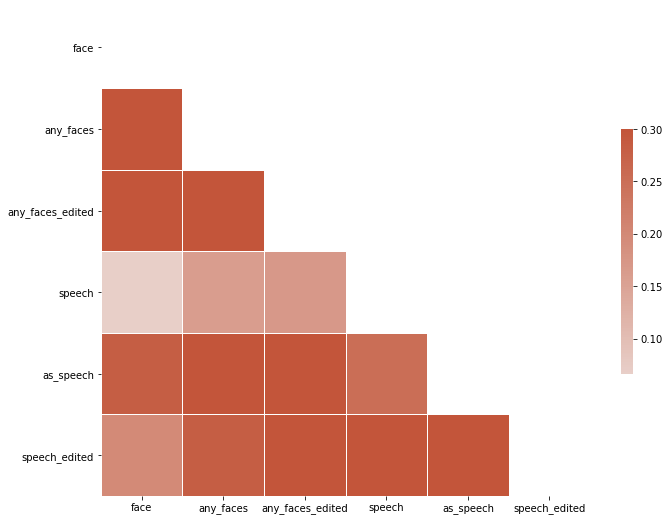

In [38]:
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Now compare the face features (convolved) to MMP FFC

In [154]:
#load timecourse of FFCs from merlin subjects

timecourse_list=[]
sub_list=[]

parcel_dir='/om2/user/jsmentch/projects/nat_img/sourcedata/data/merlin/brain/merlin_cifti_clean_smooth_mmp/'
filenames = next(walk(parcel_dir), (None, None, []))[2]  # [] if no file

for f in filenames:
    sub_id=f[12:18]

    im_file = f'{parcel_dir}{f}'
    img = nb.load(im_file)
    img_y = img.get_fdata()
    #get FFC timecourse
    timecourse=img_y[:1009,198]
    timecourse_list.append(timecourse)
    sub_list.append(sub_id)
timecourse_list=np.asarray(timecourse_list)


In [155]:
#convolve features with HRF
import hrf_tools
d_hrf=hrf_tools.apply_optimal_hrf_10hz(d.to_numpy(),10)#apply optimal HRF
d_hrf = d_hrf[::15,:] #resample to 1.5 TR

In [156]:
#append features to timecourse list
timecourse_list=np.hstack((timecourse_list.T,d_hrf))
#append feature names to timecourse sub name list
for ff in ['face','any_faces','any_faces_edited','speech','as_speech','speech_edited']:
    sub_list.append(ff)

In [157]:
timecourse_list.shape

(1009, 24)

In [159]:
df = pd.DataFrame(timecourse_list, columns = sub_list)

In [160]:
df

,sub-19,sub-20,sub-21,sub-22,sub-23,sub-24,sub-25,sub-26,sub-27,sub-28,...,sub-33,sub-34,sub-35,sub-36,face,any_faces,any_faces_edited,speech,as_speech,speech_edited
0,1.817360,0.653117,-0.941474,0.857615,2.847371,-0.473853,0.400533,-0.076522,0.430605,0.409297,...,0.703946,0.180180,0.150738,-0.443683,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.656200,0.171010,-1.072487,0.728751,1.452347,-0.241582,0.522839,-0.357468,0.923018,0.494694,...,0.440071,0.496084,0.072075,-0.684517,0.003823,0.000000,0.000000,0.0,0.000304,0.000000
2,-0.108726,-0.160301,-1.045137,0.569844,0.539096,-0.002044,0.565620,-0.381131,1.176667,0.613293,...,0.279942,0.856545,0.059584,-0.726136,0.038484,0.000000,0.000000,0.0,0.002559,0.000000
3,-0.315006,-0.246136,-0.823479,0.398035,0.296175,0.227824,0.476009,-0.077001,1.087700,0.734978,...,0.235738,1.238927,0.170743,-0.485504,0.102390,0.000000,0.000000,0.0,0.005240,0.000000
4,-0.095633,-0.088899,-0.513099,0.263396,0.542349,0.414207,0.246056,0.411469,0.741500,0.760061,...,0.213226,1.543407,0.429823,-0.042465,0.152229,0.000000,0.000000,0.0,0.007490,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,0.291535,0.752937,0.508275,0.946803,0.949713,0.902032,0.154930,0.723695,1.029614,0.335235,...,0.577158,-0.091733,-0.119042,1.329048,0.236773,0.425867,0.434903,0.0,0.044872,0.293448
1005,-0.163051,0.727011,0.343721,0.614758,0.263952,0.863913,-0.076583,0.210493,0.544479,0.386693,...,0.630828,-0.110891,-0.032076,0.943963,0.222490,0.511848,0.477288,0.0,0.048004,0.353068
1006,-0.556427,0.796988,0.183337,0.303542,-0.336178,0.749159,-0.300772,-0.140314,0.099265,0.250513,...,0.583034,-0.118487,-0.126782,0.524093,0.206868,0.562369,0.544437,0.0,0.041232,0.302984
1007,-0.703906,0.938471,0.089884,0.113618,-0.647035,0.589860,-0.390711,-0.197170,-0.114116,-0.065243,...,0.471206,-0.094254,-0.340495,0.203866,0.203820,0.628591,0.636634,0.0,0.039621,0.210550


In [180]:
# mask = np.ones_like(corr, dtype=bool)
# mask[:19,19:]=False


Text(0.5, 1.0, 'Merlin face+speech features and subject-level MMP rFFC timecourse')

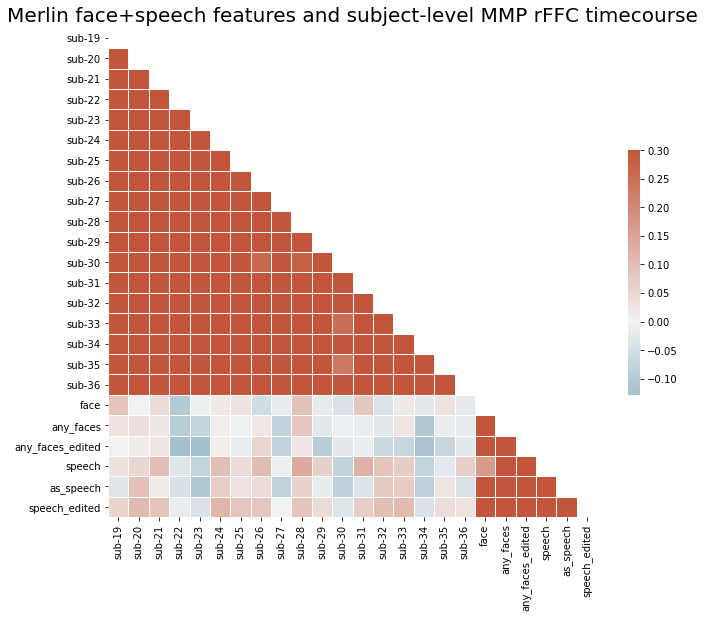

In [183]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Merlin face+speech features and subject-level MMP rFFC timecourse", fontsize =20)